In [1]:
import pandas as pd 
import geopandas as gpd
import urllib
import shapely
pd.options.mode.chained_assignment = None  # default='warn'
from math import *

In [3]:
import osmnx as ox

/Users/aconrad/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
###Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’
    if loc_type == "address":
        G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

In [18]:
G = create_graph("France", 10000, "drive")


In [22]:
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G)

In [23]:
def meilleure_station(position):
    start = position
    for i in
        start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)
# Calculate the shortest path
route = nx.shortest_path(G, start_node, end_node, weight='travel_time')
#Plot the route and street networks
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k',fig_width=12, fig_height=12 );

SyntaxError: invalid syntax (1607350960.py, line 3)

In [24]:
G_bien = create_graph("France", 100000, "drive")

KeyboardInterrupt: 

In [4]:
data_g = gpd.read_file('data/prix-carburants-fichier-quotidien-test-ods.geojson')

In [11]:
carte = gpd.read_file('data/intersections-01.geojson')

In [18]:
def distance(p1,p2):
    a1,b1 = p1
    a2,b2 = p2
    return(sqrt((a1-a2)**2 + (b1-b2)**2))

In [5]:
data_g.columns

Index(['ville', 'pop', 'reg_name', 'com_arm_code', 'dep_name', 'prix_nom',
       'com_code', 'epci_name', 'dep_code', 'services_service', 'prix_id',
       'horaires_automate_24_24', 'horaires', 'com_arm_name', 'prix_maj', 'id',
       'reg_code', 'adresse', 'epci_code', 'cp', 'prix_valeur', 'com_name',
       'geometry'],
      dtype='object')

In [6]:
def data_carb_g(df, carb):
    data_1 = df[['adresse', 'ville', 'prix_valeur', 'prix_nom', 'geometry']]
    d = data_1[data_1.prix_nom == carb]
    d.drop_duplicates(keep = 'first', inplace=True) 
    #df.drop_duplicates(subset ="'column'", keep = 'first', inplace=True) si on veut supprimer selon une colonne
    return d

In [7]:
data_2_g = data_carb_g(data_g, 'SP95').sort_values('prix_valeur')

In [8]:
data_2_g

,adresse,ville,prix_valeur,prix_nom,geometry
13694,13 Avenue Ampère,MONTIGNY-LE-BRETONNEUX,1.423,SP95,POINT (2.04800 48.79800)
372,7 rn 73,Choisey,1.509,SP95,POINT (5.45483 47.06438)
2522,RN T 10,Solenzara,1.530,SP95,POINT (9.36422 41.85789)
23277,122 Rue de Mulhouse,Saint-Louis,1.535,SP95,POINT (7.55569 47.59335)
17153,RUE DES DOCTEURS VIZERIE,BERGERAC,1.536,SP95,POINT (0.49300 44.85000)
...,...,...,...,...,...
31775,15 Avenue Duquesne,PARIS,2.600,SP95,POINT (2.30800 48.85300)
19519,69 Avenue Kléber,Paris,2.640,SP95,POINT (2.28900 48.86500)
30427,253 Boulevard Raspail,PARIS,2.690,SP95,POINT (2.33100 48.83800)
20351,175 Avenue Ledru-Rollin,PARIS,2.900,SP95,POINT (2.37910 48.85667)


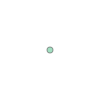

In [7]:
data_2_g.loc[58312, 'geometry']

In [8]:
data_2_g.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
from geopy.geocoders import Nominatim


def Adresse_to_gps(Adresse) : 

    geolocator = Nominatim(user_agent="Projet Python")
    location = geolocator.geocode(Adresse)
    return location.latitude, location.longitude


Adresse_to_gps("1 rue d'Arsonval, Orsay, France")

(48.7087952, 2.1742033)

In [23]:
point = shapely.geometry.Point(Adresse_to_gps("1 rue d'Arsonval, Orsay, France"))
col_adresse = gpd.GeoSeries((point for i in range(len(data_2_g))),index= data_2_g.index, crs = 4326)

In [24]:
col_adresse.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
data_2_g.distance(col_adresse)

C:\Users\hugol\AppData\Local\Temp\ipykernel_12112\689889311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_2_g.distance(col_adresse)


2402     65.583262
60125    65.962173
36655    60.991362
22911    66.983776
25102    66.041809
           ...    
44978    65.799920
11148    65.817504
43359    65.839410
4049     65.790651
58312    65.770003
Length: 3709, dtype: float64